In [77]:
# ! cd cdli; git clone https://github.com/cdli-gh/data

In [78]:
# ! cd data; git lfs status

In [79]:
import re
import unicodedata

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Import Dataset From CDLI and Save it - Run the first time ONLY

In [80]:
COLS = [
    'id_text',
    'genre',
    'subgenre',
    'period',
    'provenience',
    'id',
    'photo_up',
    'height',
    'width',
    'thickness',
]

In [81]:
df = pd.read_csv("https://media.githubusercontent.com/media/cdli-gh/data/master/cdli_cat.csv", usecols=COLS)

/tmp/ipykernel_25761/3012391959.py:1: DtypeWarning: Columns (33,46,60,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("https://media.githubusercontent.com/media/cdli-gh/data/master/cdli_cat.csv", usecols=COLS)


## Remove samples with no image

In [87]:
df = df[df.photo_up.notnull()].copy()

In [84]:
df.to_csv('cdli/data/cdli_cat.csv', index=False)

# Initial Data Exploration

In [85]:
df = pd.read_csv('cdli/data/cdli_cat.csv', keep_default_na=False, usecols=COLS)

In [82]:
df.shape

(353283, 10)

In [83]:
df.sample(5)

,genre,height,id,id_text,period,photo_up,provenience,subgenre,thickness,width
21428,Administrative,?,21429,112709,Ur III (ca. 2100-2000 BC),NaN,Umma (mod. Tell Jokha),NaN,?,?
232470,NaN,NaN,232519,397859,Neo-Assyrian (ca. 911-612 BC),600ppi 20160630,Nineveh (mod. Kuyunjik),NaN,NaN,NaN
27567,Administrative,?,27568,118911,Ur III (ca. 2100-2000 BC),NaN,Umma (mod. Tell Jokha),NaN,?,?
309374,Administrative,NaN,309431,478239,Old Akkadian (ca. 2340-2200 BC),NaN,uncertain (mod. uncertain),physical cylinder seal,NaN,NaN
137082,Administrative,NaN,137120,294944,Ur III (ca. 2100-2000 BC),NaN,Umma (mod. Tell Jokha),NaN,NaN,NaN


# Preprocessing

## Preprocess the `period` column and extract the period name and the year range 

In [90]:
df[['period_normed', 'year_range']] = df['period'].str.extract(r'([^\(]+)\s*\(ca\.\s*([0-9]+-[0-9]+\s*BC)\)')
df['period_normed'] = df['period_normed'].str.strip()
df['year_range'] = df['year_range'].str.strip()

df.loc[df['period_normed']=='Middle Hittite', 'period_normed'] = 'Hittite'

In [91]:
df.sample(5)

,genre,height,id,id_text,period,photo_up,provenience,subgenre,thickness,width,period_normed,year_range
186738,Lexical,,186776,349908,,,Assur (mod. Qalat Sherqat),god list,,,NaN,NaN
278290,,,278340,445957,Middle Hittite (ca. 1500-1100 BC),,Ḫattusa (mod. Boğazkale),,,,Middle Hittite,1500-1100 BC
298051,Royal/Monumental,,298108,466206,Middle Assyrian (ca. 1400-1000 BC),,Assur (mod. Qalat Sherqat),witness,,,Middle Assyrian,1400-1000 BC
125953,Legal,?,125991,279336,Neo-Babylonian (ca. 626-539 BC) ?,600ppi 20160630,Nippur (mod. Nuffar),,?,?,Neo-Babylonian,626-539 BC
346979,Letter,,355814,526019,Old Babylonian (ca. 1900-1600 BC),,Mari (mod. Tell Hariri),,,,Old Babylonian,1900-1600 BC


### Remove samples with no period specified

In [92]:
df = df[df.period_normed.notnull()].copy()

In [93]:
df.shape

(320368, 12)

In [94]:
df.sample(5)

,genre,height,id,id_text,period,photo_up,provenience,subgenre,thickness,width,period_normed,year_range
332971,Legal,,341806,511312,Old Babylonian (ca. 1900-1600 BC),,Tutub (mod. Khafaje),,,,Old Babylonian,1900-1600 BC
320614,Legal,,329424,498846,Old Assyrian (ca. 1950-1850 BC),,Kanesh (mod. Kültepe),,,,Old Assyrian,1950-1850 BC
335110,Royal/Monumental,128,343945,513484,Lagash II (ca. 2200-2100 BC),,uncertain (mod. uncertain),witness,81,171,Lagash II,2200-2100 BC
207377,,,207424,371811,Neo-Babylonian (ca. 626-539 BC),,,,,,Neo-Babylonian,626-539 BC
275916,,,275966,443583,Middle Hittite (ca. 1500-1100 BC),,Ḫattusa (mod. Boğazkale),,,,Middle Hittite,1500-1100 BC


/home/kapond/.conda/envs/dani_torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kapond/.conda/envs/dani_torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kapond/.conda/envs/dani_torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


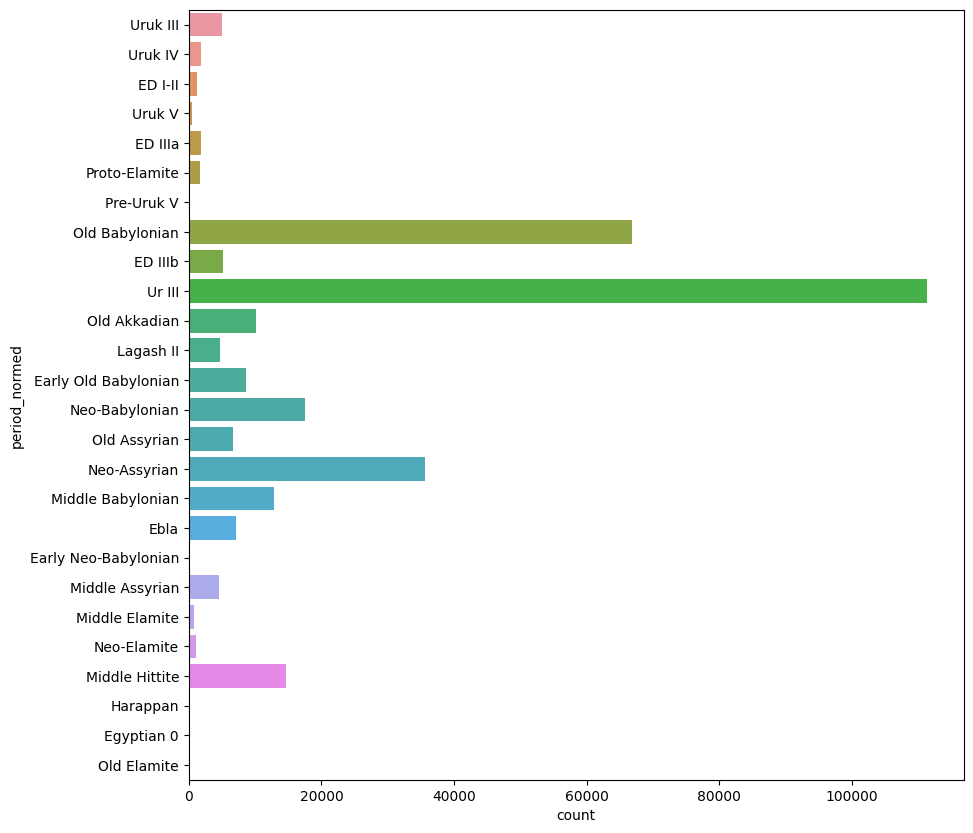

In [103]:
plt.figure(figsize=(10,10))
sns.countplot(y = df.period_normed);

## Map periods to eras

In [95]:
EARLY_BRONZE = {
    'Old Akkadian', 'Ur III',
    'ED IIIb', 'Uruk III',
    'Proto-Elamite', 'Lagash II',
    'Ebla', 'ED IIIa', 'ED I-II',
    'Uruk IV', 'Linear Elamite',
    'Harappan'
    
}
MID_LATE_BRONZE = {
    'Early Old Babylonian',
    'Old Babylonian', 'Old Assyrian',
    'Middle Babylonian', 'Middle Assyrian',
    'Middle Elamite', 'Hittite'
}
IRON = {
    'Neo-Babylonian', 'Neo-Assyrian',
    'Achaemenid', 'Hellenistic',
    'Neo-Elamite'
}

In [96]:
ERA_MAP = {
    **{K: 'early_bronze' for K in EARLY_BRONZE},
    **{K: 'mid_late_bronze' for K in MID_LATE_BRONZE},
    **{K: 'iron' for K in IRON},
}

### Explore the `era` column

In [97]:
df['era'] = df.period_normed.map(ERA_MAP).fillna('')

In [98]:
df.sample(10)

,genre,height,id,id_text,period,photo_up,provenience,subgenre,thickness,width,period_normed,year_range,era
277708,,,277758,445375,Middle Hittite (ca. 1500-1100 BC),,Ḫattusa (mod. Boğazkale),,,,Middle Hittite,1500-1100 BC,mid_late_bronze
199757,uncertain,,199795,363483,Neo-Assyrian (ca. 911-612 BC),,Kalhu (mod. Nimrud),,,,Neo-Assyrian,911-612 BC,iron
196814,,,196852,360459,Old Assyrian (ca. 1950-1850 BC),,Kanesh (mod. Kültepe),,,,Old Assyrian,1950-1850 BC,mid_late_bronze
275788,,,275838,443455,Middle Hittite (ca. 1500-1100 BC),,Ḫattusa (mod. Boğazkale),,,,Middle Hittite,1500-1100 BC,mid_late_bronze
104780,Legal,?,104782,255218,Old Babylonian (ca. 1900-1600 BC),600ppi 20160630,Nippur (mod. Nuffar),,?,?,Old Babylonian,1900-1600 BC,mid_late_bronze
270094,,,270144,437756,Middle Hittite (ca. 1500-1100 BC),,Ḫattusa (mod. Boğazkale),,,,Middle Hittite,1500-1100 BC,mid_late_bronze
97717,Administrative,34,97719,247918,Old Babylonian (ca. 1900-1600 BC),600ppi 20160630,Tutub (mod. Khafaje),,17,33,Old Babylonian,1900-1600 BC,mid_late_bronze
138958,Administrative,36,138996,296859,Old Babylonian (ca. 1900-1600 BC),,,,24,34,Old Babylonian,1900-1600 BC,mid_late_bronze
14729,Administrative,?,14730,105863,Ur III (ca. 2100-2000 BC),,Puzriš-Dagan (mod. Drehem),,?,?,Ur III,2100-2000 BC,early_bronze
26365,Letter,?,26366,117704,Ur III (ca. 2100-2000 BC),,Umma (mod. Tell Jokha),,?,?,Ur III,2100-2000 BC,early_bronze


In [99]:
df.era.value_counts(dropna=False)

era
early_bronze       150003
mid_late_bronze    115099
iron                54211
                     1055
Name: count, dtype: int64

In [100]:
df.period_normed.nunique()

26

In [101]:
df.period_normed[df.era == ''].nunique()

5

In [102]:
df.period_normed[df.era == ''].value_counts().sort_values()

period_normed
Old Elamite               1
Egyptian 0              186
Pre-Uruk V              219
Early Neo-Babylonian    231
Uruk V                  418
Name: count, dtype: int64

## Remove samples with no era or period

In [104]:
df = df[(df.era != '')&(df.period_normed != '')&(df.period_normed.notnull())]

## Preprocess the provenience column

In [115]:
def normalize_special_characters(text):
    text = unicodedata.normalize('NFKD', text)
    return ''.join([c for c in text if not unicodedata.combining(c)])

df['provenience_normed'] = df['provenience'].fillna('unknown').str.replace(r'\s+', ' ', regex=True) \
                                  .str.replace(r'\?', '', regex=True) \
                                  .str.strip() \
                                  .str.replace(r'\s+\)', ')', regex=True) \
                                  .apply(normalize_special_characters)

In [116]:
def extract_relevant_prov(text):
    if text.startswith('uncertain'):
        # Extracts text within parentheses.
        match = re.search(r'\((.*?)\)', text)
        return match.group(1) if match else text
    else:
        # Extracts text outside parentheses.
        return re.sub(r'\s*\(.+?\)', '', text)

df['provenience_normed'] = df['provenience_normed'].apply(extract_relevant_prov)

In [118]:
df.sample(5)

,genre,id,id_text,period,photo_up,subgenre,period_normed,era,provenience_normed,height,width,thickness,year_range,provenience
58133,Omen,173770,336484,Neo-Assyrian (ca. 911-612 BC),600ppi 20160630,NaN,Neo-Assyrian,iron,Nineveh,NaN,NaN,NaN,911-612 BC,Nineveh (mod. Kuyunjik)
23292,Administrative,70675,221948,ED IIIb (ca. 2500-2340 BC),600ppi 20160630,NaN,ED IIIb,early_bronze,Girsu,?,?,?,2500-2340 BC,Girsu (mod. Tello)
37338,Administrative,105487,255944,Middle Babylonian (ca. 1400-1100 BC),600ppi 20160630,NaN,Middle Babylonian,mid_late_bronze,Nippur,?,?,?,1400-1100 BC,Nippur (mod. Nuffar)
81903,Omen,248530,414242,Neo-Babylonian (ca. 626-539 BC) ?,600ppi 20160630,EAE Venus F,Neo-Babylonian,iron,Uruk,NaN,NaN,NaN,626-539 BC,Uruk (mod. Warka)
64621,Administrative,217786,382399,Old Akkadian (ca. 2340-2200 BC),600ppi 20160630,NaN,Old Akkadian,early_bronze,Adab,NaN,NaN,NaN,2340-2200 BC,Adab (mod. Bismaya)


In [119]:
pd.set_option('display.max_rows', len(df))

df['provenience_normed'].value_counts()

provenience_normed
Nineveh                    22472
Nippur                     16136
unknown                    13369
Umma                       10673
Puzris-Dagan                8514
Girsu                       4809
mod. uncertain              4297
Ur                          2430
Kanesh                      1476
Uruk                        1318
Assur                       1179
Adab                        1092
Garsana                      954
Gasur/Nuzi                   892
Susa                         845
Larsa                        698
Nerebtum                     697
Sippar-Yahrurum              682
mod. Babylonia               675
Kish                         572
Kalhu                        492
Tuttul                       369
Suruppak                     363
Ebla                         243
Babili                       223
mod. Beydar                  214
Akhetaten                    198
Esnunna                      155
Kar-Tukulti-Ninurta          137
mod. Jemdet Nasr        

In [120]:
df.loc[df['provenience_normed']=="mod. uncertain","provenience_normed"]="unknown"

In [121]:
len(df)

97716

## Save df after merge

In [123]:
df.to_csv("output/cdli_catalogue_data.csv", index = False)